### Data Cleaning

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

In [51]:
all_wine = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\all_wine_str.csv', sep=',')

In [52]:
all_wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
type                    0
dtype: int64

In [53]:
all_wine.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,type
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,white
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,white
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,white
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,white
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium,white
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,white
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,white
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,medium,white


In [54]:
all_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


### Encoding

In [55]:
all_wine_with_dummies=pd.DataFrame(all_wine)
#leave at 0,1,2
# Map the 'quality_label' column to combine 'low' and 'medium' as 0, and 'high' as 1
all_wine_with_dummies['quality_label'] = all_wine_with_dummies['quality_label'].map({'low': 0, 'medium': 1, 'high': 2})

# Map the 'type' column to encode 'white' as 0 and 'red' as 1
all_wine_with_dummies['type'] = all_wine_with_dummies['type'].map({'white': 0, 'red': 1})

# View the transformed dataframe
print(all_wine_with_dummies.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  quality_label  type  
0      8.8        6              1     0  


In [56]:
all_wine_with_dummies.head(50)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,type
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1,0
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1,0


In [57]:
all_wine_with_dummies.tail(50)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,type
6447,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8,2,1
6448,7.1,0.680,0.00,2.3,0.087,17.0,26.0,0.99783,3.45,0.53,9.50,5,0,1
6449,7.1,0.670,0.00,2.3,0.083,18.0,27.0,0.99768,3.44,0.54,9.40,5,0,1
6450,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.30,6,1,1
6451,7.3,0.735,0.00,2.2,0.080,18.0,28.0,0.99765,3.41,0.60,9.40,5,0,1
6452,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.00,6,1,1
6453,7.0,0.560,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,1,1
6454,6.6,0.880,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.90,5,0,1
6455,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.00,6,1,1
6456,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5,0,1


### Correlation Maps

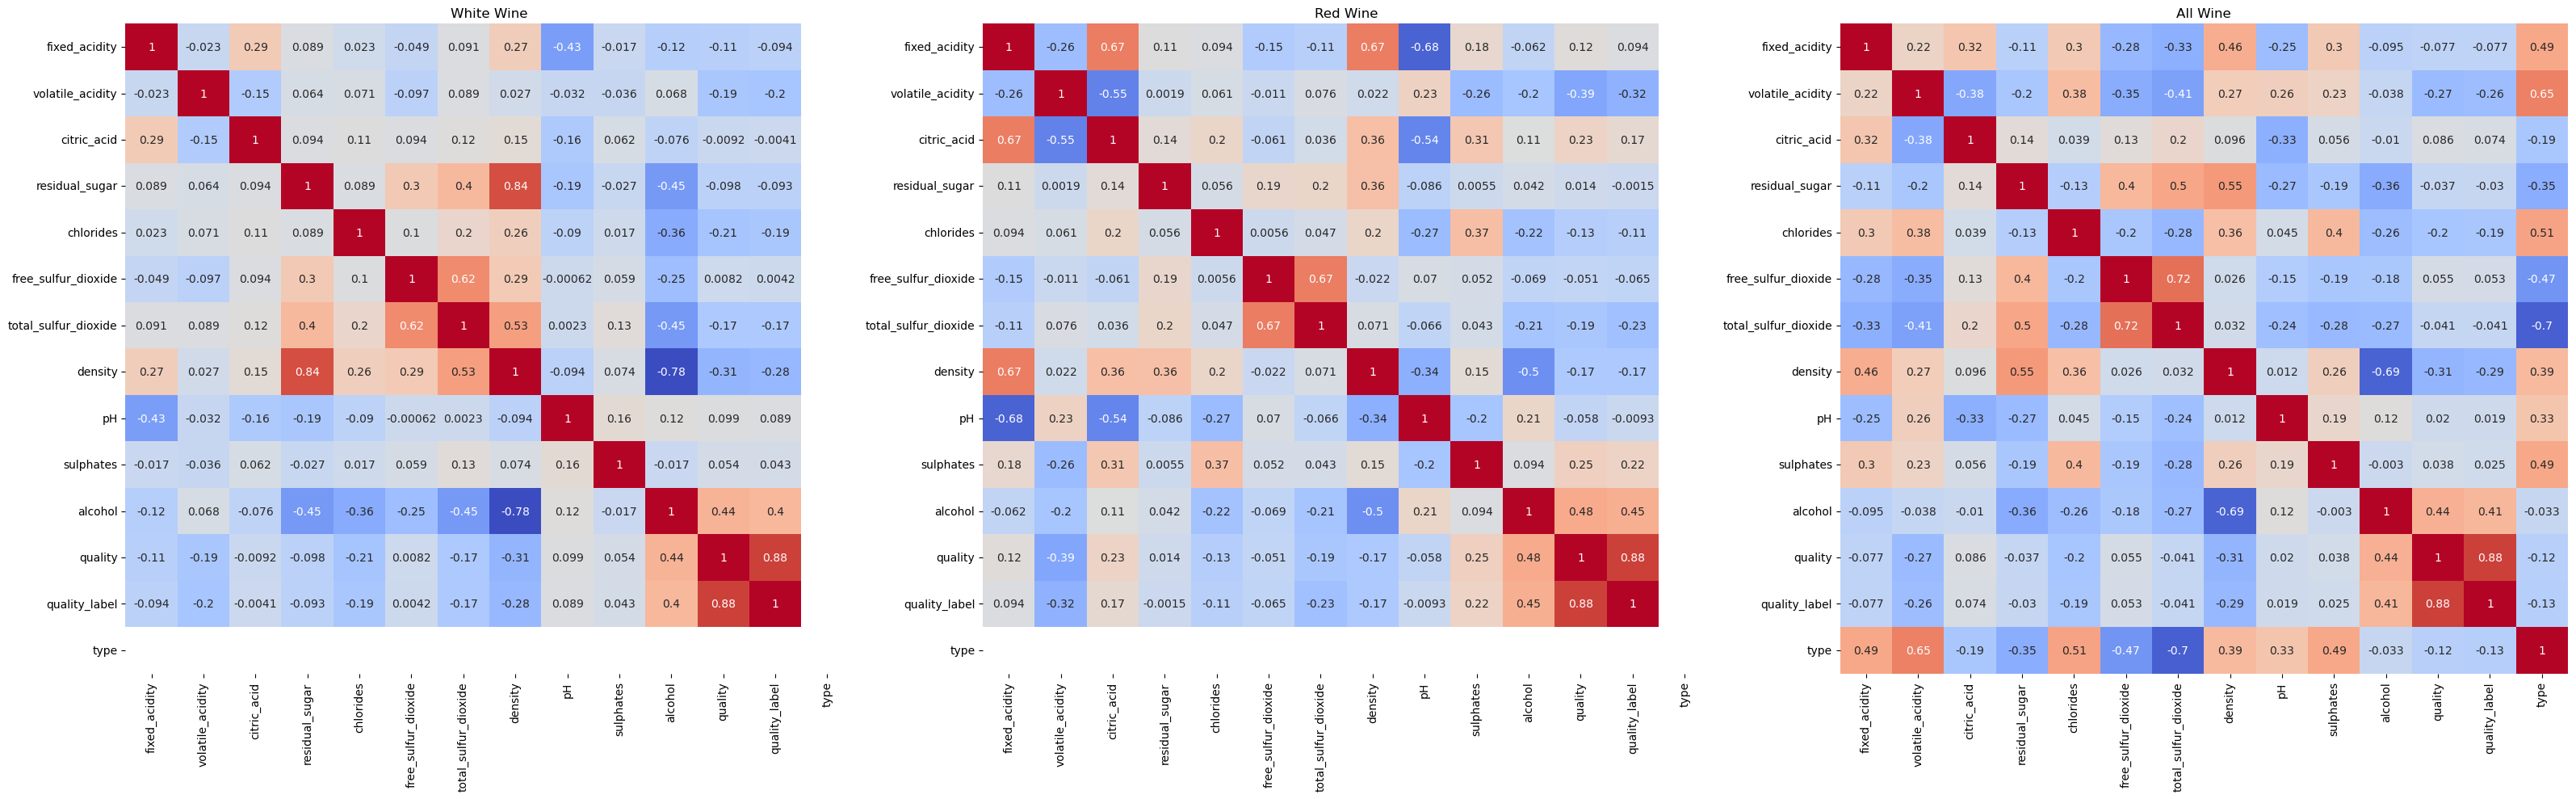

In [58]:
# Prepare dataframes for comparison
all_wine_corr = all_wine_with_dummies.corr()

white_wines = all_wine_with_dummies[all_wine_with_dummies['type']==0]
white_wine_corr = white_wines.corr()

red_wines = all_wine_with_dummies[all_wine_with_dummies['type']==1]
red_wine_corr = red_wines.corr()

# Create plot
fig, axes = plt.subplots(1, 3, figsize=(32, 10))

# Define a consistent vmin and vmax for all heatmaps to ensure the color range is consistent
vmin = min(white_wine_corr.min().min(), red_wine_corr.min().min(), all_wine_corr.min().min())
vmax = max(white_wine_corr.max().max(), red_wine_corr.max().max(), all_wine_corr.max().max())

# Plot each heatmap on a different subplot with the same vmin and vmax, and completely remove the color bar
sns.heatmap(white_wine_corr, ax=axes[0], cmap="coolwarm", cbar=False, vmin=vmin, vmax=vmax, annot = True)
axes[0].set_title('White Wine')
sns.heatmap(red_wine_corr, ax=axes[1], cmap="coolwarm", cbar=False, vmin=vmin, vmax=vmax, annot = True)
axes[1].set_title('Red Wine')
sns.heatmap(all_wine_corr, ax=axes[2], cmap="coolwarm", cbar=False, vmin=vmin, vmax=vmax, annot = True)
axes[2].set_title('All Wine')

# Adjust the layout to make sure all plots have the same size
plt.tight_layout(rect=[0, 0, 1, 1])  # No need to leave space for the color bar

# Display the heatmaps without any color bar
plt.show()


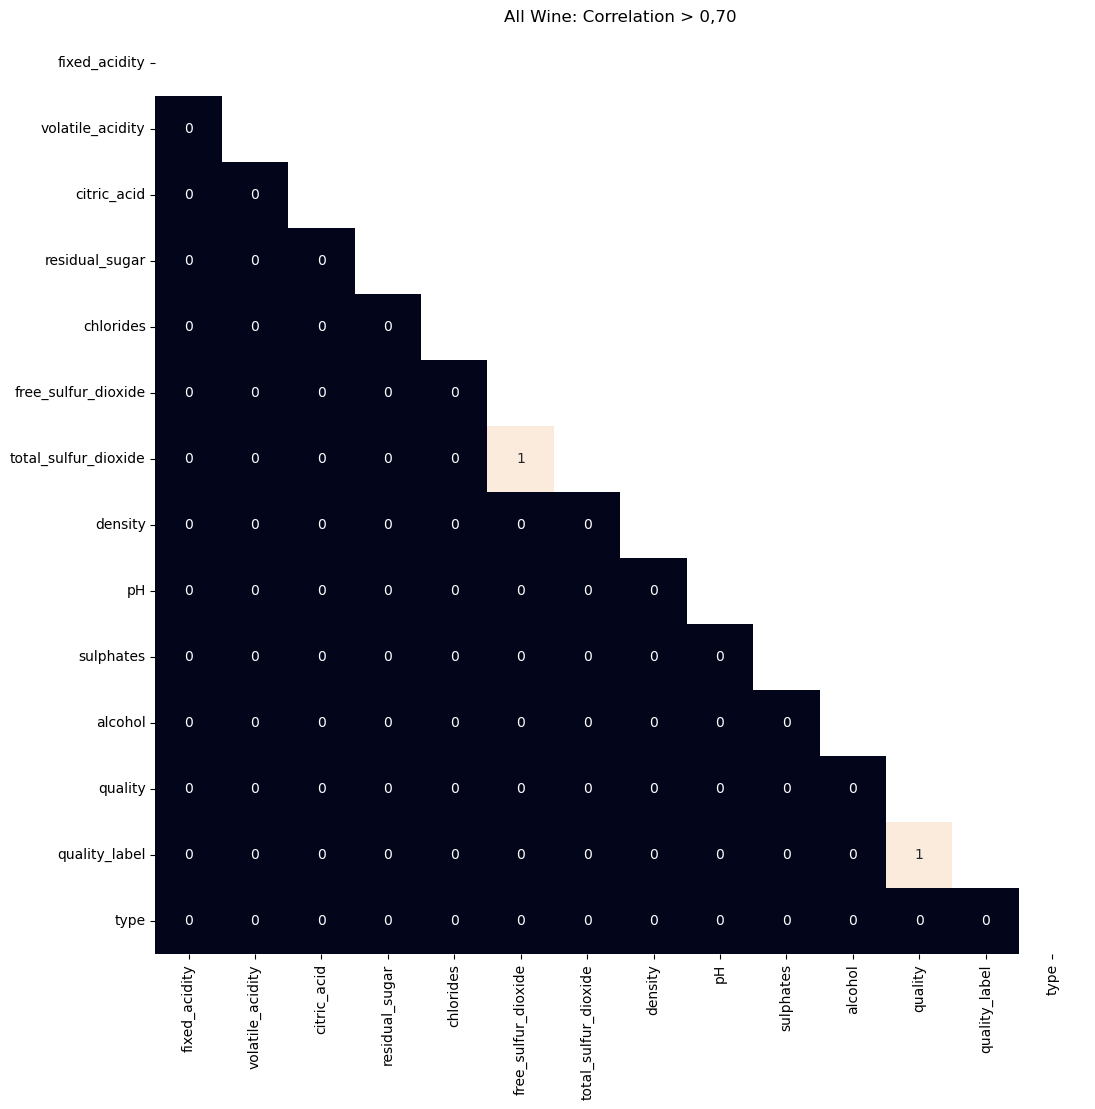

In [59]:
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(all_wine_with_dummies.corr(), dtype=bool))
sns.heatmap(all_wine_with_dummies.corr() > 0.7, mask=mask, annot=True, cbar=False).set_title('All Wine: Correlation > 0,70')
plt.show()

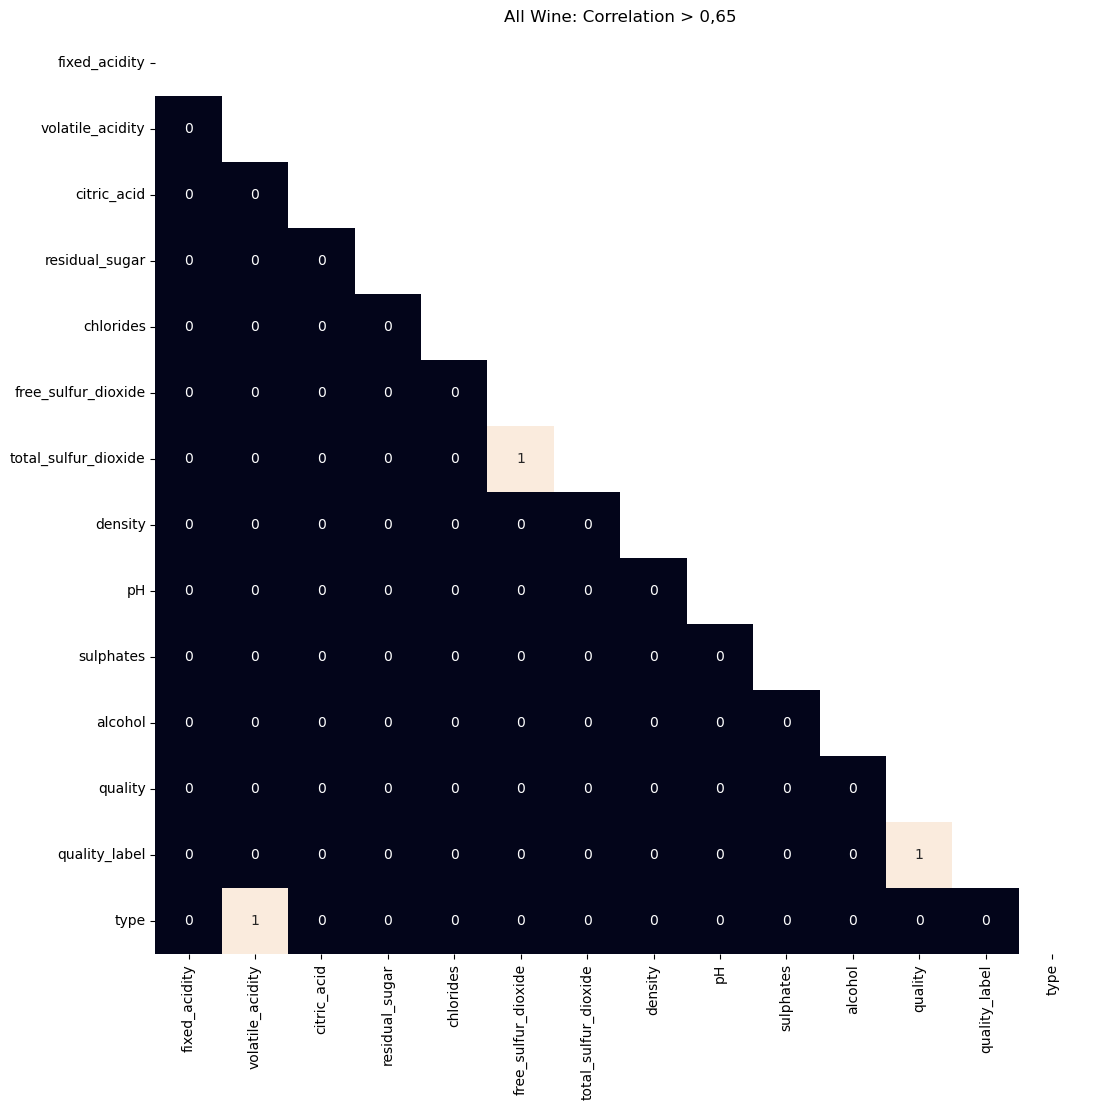

In [60]:
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(all_wine_with_dummies.corr(), dtype=bool))
sns.heatmap(all_wine_with_dummies.corr() > 0.65, mask=mask, annot=True, cbar=False).set_title('All Wine: Correlation > 0,65')
plt.show()

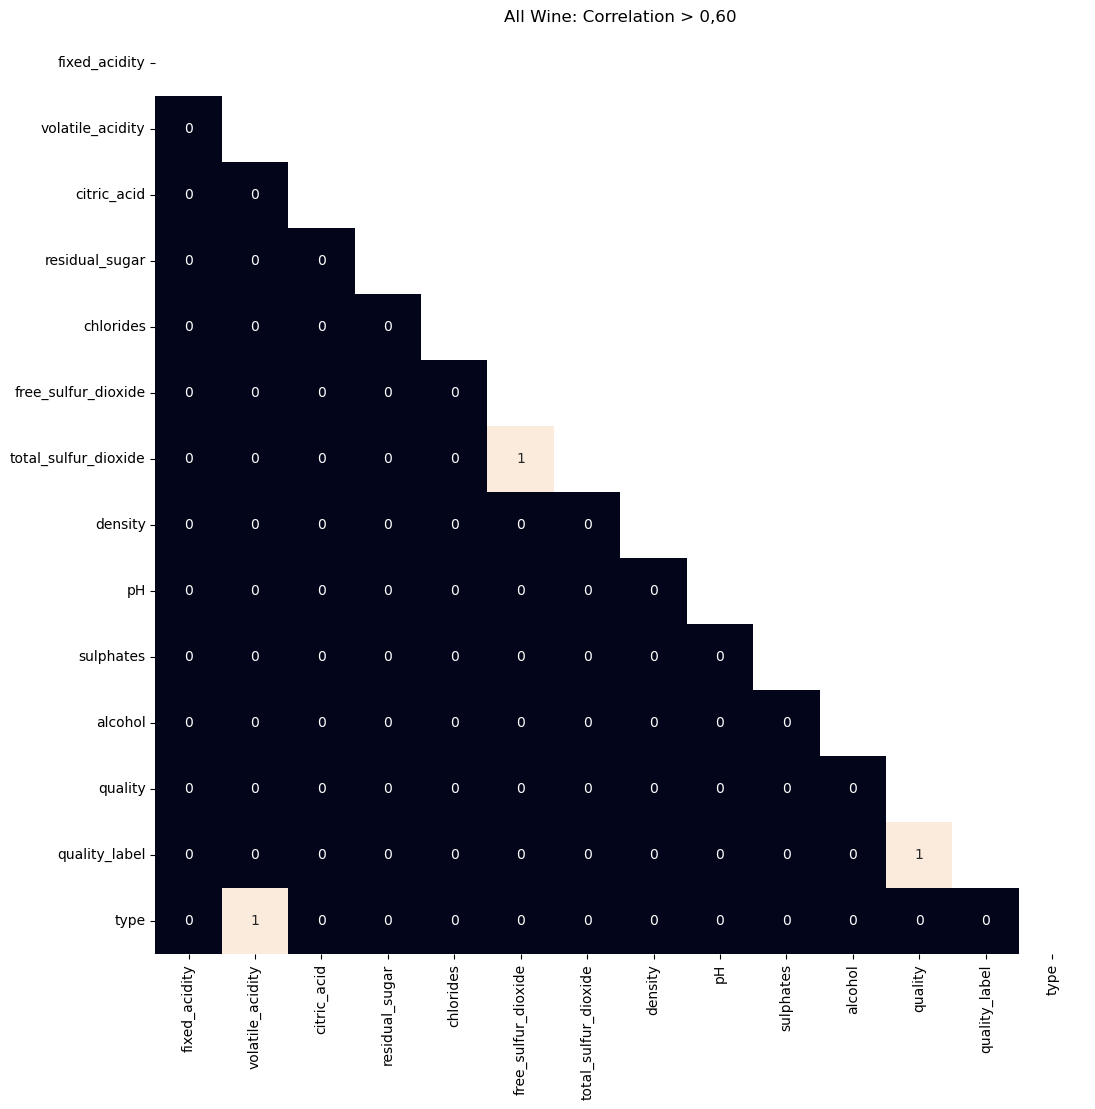

In [61]:
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(all_wine_with_dummies.corr(), dtype=bool))
sns.heatmap(all_wine_with_dummies.corr() > 0.60, mask=mask, annot=True, cbar=False).set_title('All Wine: Correlation > 0,60')
plt.show()

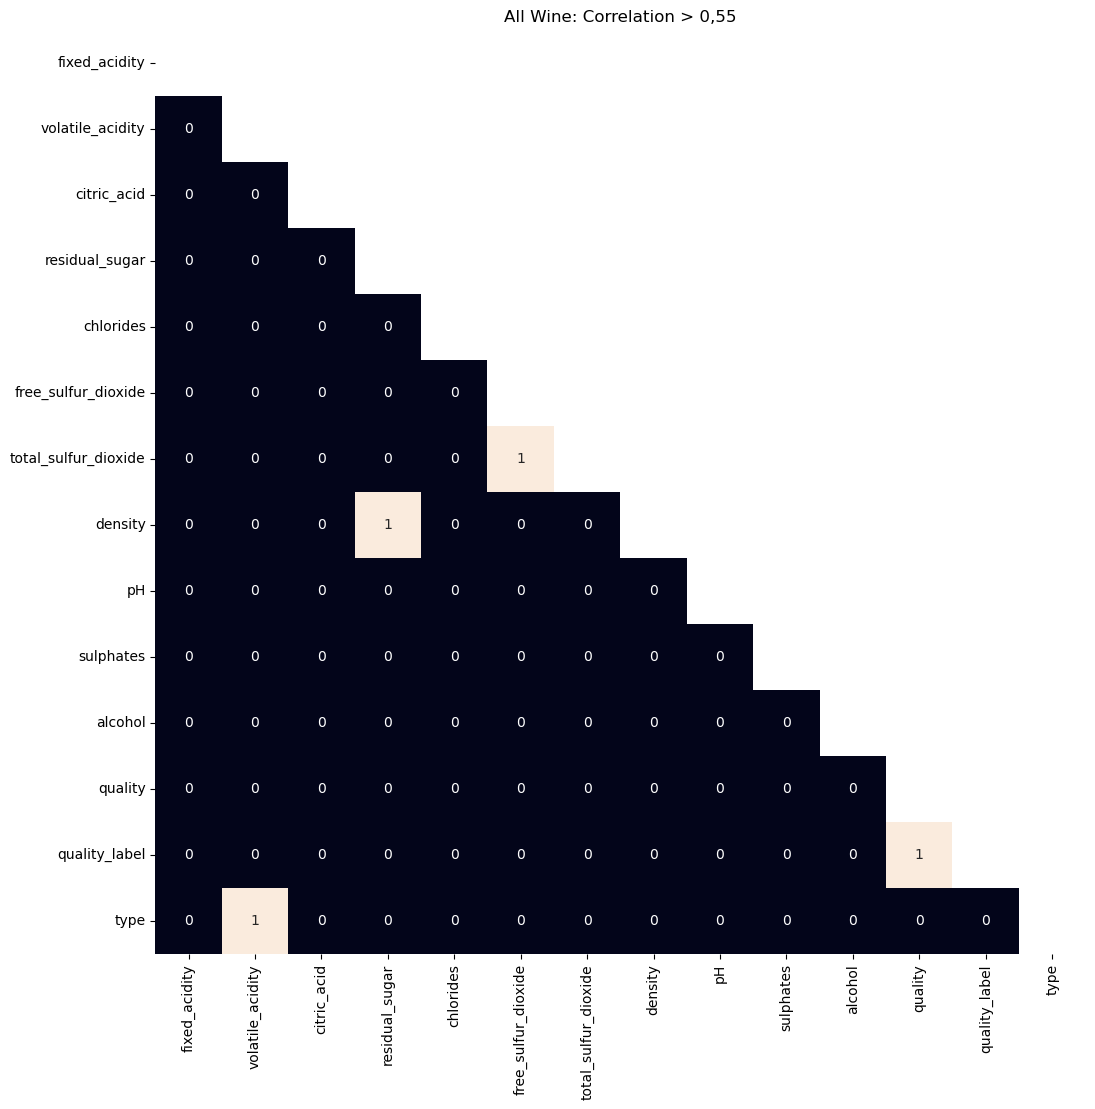

In [62]:
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(all_wine_with_dummies.corr(), dtype=bool))
sns.heatmap(all_wine_with_dummies.corr() > 0.55, mask=mask, annot=True, cbar=False).set_title('All Wine: Correlation > 0,55')
plt.show()


### Dropping Highly Correlated Features

In [63]:
#Dropping 'free_sulfur_dioxide' due to correlation with 'total_sulfur_dioxide', keeping 'total...' due to slightly higher correlation with 'quality'
#Dropping 'density' die to correlation with 'alcohol', keeping 'alcohol' due to higher correlation with quality
all_wine_reduced=all_wine_with_dummies.copy()

all_wine_reduced = all_wine_with_dummies.drop(['free_sulfur_dioxide','density'], axis=1)
all_wine_reduced.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality,quality_label,type
0,7.0,0.27,0.36,20.7,0.045,170.0,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6,1,0


In [64]:
all_wine_reduced.shape

(6497, 12)

### Outlier Removal

In [65]:
#This is based on the boxplot: the features that have strong outliers, but are not correlating much with 'quality' are:

#0,014 Residual Sugar
#0,038 Sulphates
#0,051 Free Sulfur Dioxide
#0,058 pH

#Outliers are only removed for low and medium quality:

all_wine_low = all_wine_reduced[all_wine_reduced['quality_label'] == 0]
all_wine_medium = all_wine_reduced[all_wine_reduced['quality_label'] == 1]
all_wine_high = all_wine_reduced[all_wine_reduced['quality_label'] == 2]

In [66]:
all_wine_low.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality,quality_label,type
10,8.1,0.27,0.41,1.45,0.033,63.0,2.99,0.56,12.0,5,0,0
11,8.6,0.23,0.40,4.20,0.035,109.0,3.14,0.53,9.7,5,0,0
12,7.9,0.18,0.37,1.20,0.040,75.0,3.18,0.63,10.8,5,0,0
14,8.3,0.42,0.62,19.25,0.040,172.0,2.98,0.67,9.7,5,0,0
19,6.5,0.31,0.14,7.50,0.044,133.0,3.22,0.50,9.5,5,0,0


In [67]:
all_wine_medium.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality,quality_label,type
0,7.0,0.27,0.36,20.7,0.045,170.0,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6,1,0


In [68]:
all_wine_high.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality,quality_label,type
17,6.2,0.66,0.48,1.2,0.029,75.0,3.33,0.39,12.8,8,2,0
20,6.2,0.66,0.48,1.2,0.029,75.0,3.33,0.39,12.8,8,2,0
22,6.8,0.26,0.42,1.7,0.049,122.0,3.47,0.48,10.5,8,2,0
68,6.7,0.23,0.31,2.1,0.046,96.0,3.33,0.64,10.7,8,2,0
74,6.7,0.23,0.31,2.1,0.046,96.0,3.33,0.64,10.7,8,2,0


In [69]:
def remove_outliers(df, columns):

    # Create a copy of the DataFrame
    df_copy = df.copy()

    for col in columns:
        if col in df_copy.columns:  # Ensure the column exists
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df_copy[col].quantile(0.25)
            Q3 = df_copy[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Print IQR and bounds for debugging (optional)
            print(f"Column: {col}")
            print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
            print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

            # Filter the DataFrame to exclude outliers
            before_rows = df_copy.shape[0]
            df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]
            after_rows = df_copy.shape[0]

            # Print how many rows were removed (optional)
            print(f"Rows before: {before_rows}, Rows after: {after_rows}\n")
        else:
            print(f"Column '{col}' not found in DataFrame.")
    
    return df_copy

In [70]:
all_wine_low = pd.DataFrame(all_wine_low)

# Remove outliers from the specified columns
all_wine_low_cleaned = remove_outliers(all_wine_low, ['residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'pH'])

# Display the original and cleaned DataFrames
print("Original DataFrame:")
print(all_wine_low)
print("\nCleaned DataFrame (with outliers removed):")
print(all_wine_low_cleaned)


Column: residual_sugar
Q1: 1.8, Q3: 8.525, IQR: 6.7250000000000005
Lower bound: -8.2875, Upper bound: 18.6125
Rows before: 2384, Rows after: 2357

Column: sulphates
Q1: 0.44, Q3: 0.58, IQR: 0.13999999999999996
Lower bound: 0.23000000000000007, Upper bound: 0.7899999999999999
Rows before: 2357, Rows after: 2268

Column: total_sulfur_dioxide
Q1: 71.0, Q3: 168.0, IQR: 97.0
Lower bound: -74.5, Upper bound: 313.5
Rows before: 2268, Rows after: 2265

Column: pH
Q1: 3.11, Q3: 3.31, IQR: 0.20000000000000018
Lower bound: 2.8099999999999996, Upper bound: 3.6100000000000003
Rows before: 2265, Rows after: 2227

Original DataFrame:
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
10              8.1             0.270         0.41            1.45      0.033   
11              8.6             0.230         0.40            4.20      0.035   
12              7.9             0.180         0.37            1.20      0.040   
14              8.3             0.420         0.6

In [71]:
all_wine_low_cleaned.shape

(2227, 12)

In [72]:
all_wine_medium = pd.DataFrame(all_wine_medium)

# Remove outliers from the specified columns
all_wine_medium_cleaned = remove_outliers(all_wine_medium, ['residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'pH'])

# Display the original and cleaned DataFrames
print("Original DataFrame:")
print(all_wine_medium)
print("\nCleaned DataFrame (with outliers removed):")
print(all_wine_medium_cleaned)

Column: residual_sugar
Q1: 1.8, Q3: 7.9, IQR: 6.1000000000000005
Lower bound: -7.3500000000000005, Upper bound: 17.05
Rows before: 3915, Rows after: 3835

Column: sulphates
Q1: 0.43, Q3: 0.62, IQR: 0.19
Lower bound: 0.14499999999999996, Upper bound: 0.905
Rows before: 3835, Rows after: 3758

Column: total_sulfur_dioxide
Q1: 81.0, Q3: 150.0, IQR: 69.0
Lower bound: -22.5, Upper bound: 253.5
Rows before: 3758, Rows after: 3754

Column: pH
Q1: 3.11, Q3: 3.33, IQR: 0.2200000000000002
Lower bound: 2.7799999999999994, Upper bound: 3.66
Rows before: 3754, Rows after: 3721

Original DataFrame:
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4  

In [73]:
all_wine_medium_cleaned.shape

(3721, 12)

In [74]:
all_wine_high.shape

(198, 12)

In [75]:
all_wine_cleaned = pd.concat([all_wine_low_cleaned, all_wine_medium_cleaned, all_wine_high], ignore_index=True)

In [76]:
all_wine_cleaned.shape

(6146, 12)

In [77]:
all_wine_cleaned

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality,quality_label,type
0,8.1,0.27,0.41,1.45,0.033,63.0,2.99,0.56,12.0,5,0,0
1,8.6,0.23,0.40,4.20,0.035,109.0,3.14,0.53,9.7,5,0,0
2,7.9,0.18,0.37,1.20,0.040,75.0,3.18,0.63,10.8,5,0,0
3,6.5,0.31,0.14,7.50,0.044,133.0,3.22,0.50,9.5,5,0,0
4,7.6,0.67,0.14,1.50,0.074,168.0,3.05,0.51,9.3,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6141,8.6,0.42,0.39,1.80,0.068,12.0,3.35,0.69,11.7,8,2,1
6142,5.5,0.49,0.03,1.80,0.044,87.0,3.50,0.82,14.0,8,2,1
6143,7.2,0.33,0.33,1.70,0.061,13.0,3.23,1.10,10.0,8,2,1
6144,7.2,0.38,0.31,2.00,0.056,29.0,3.23,0.76,11.3,8,2,1


In [78]:
all_wine_cleaned.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
total_sulfur_dioxide    float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_label             int64
type                      int64
dtype: object

### Log Transformation

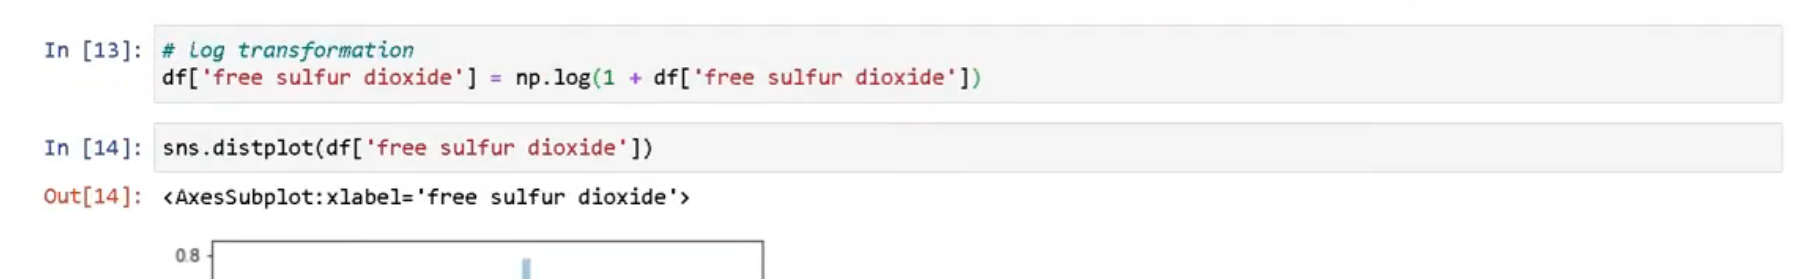

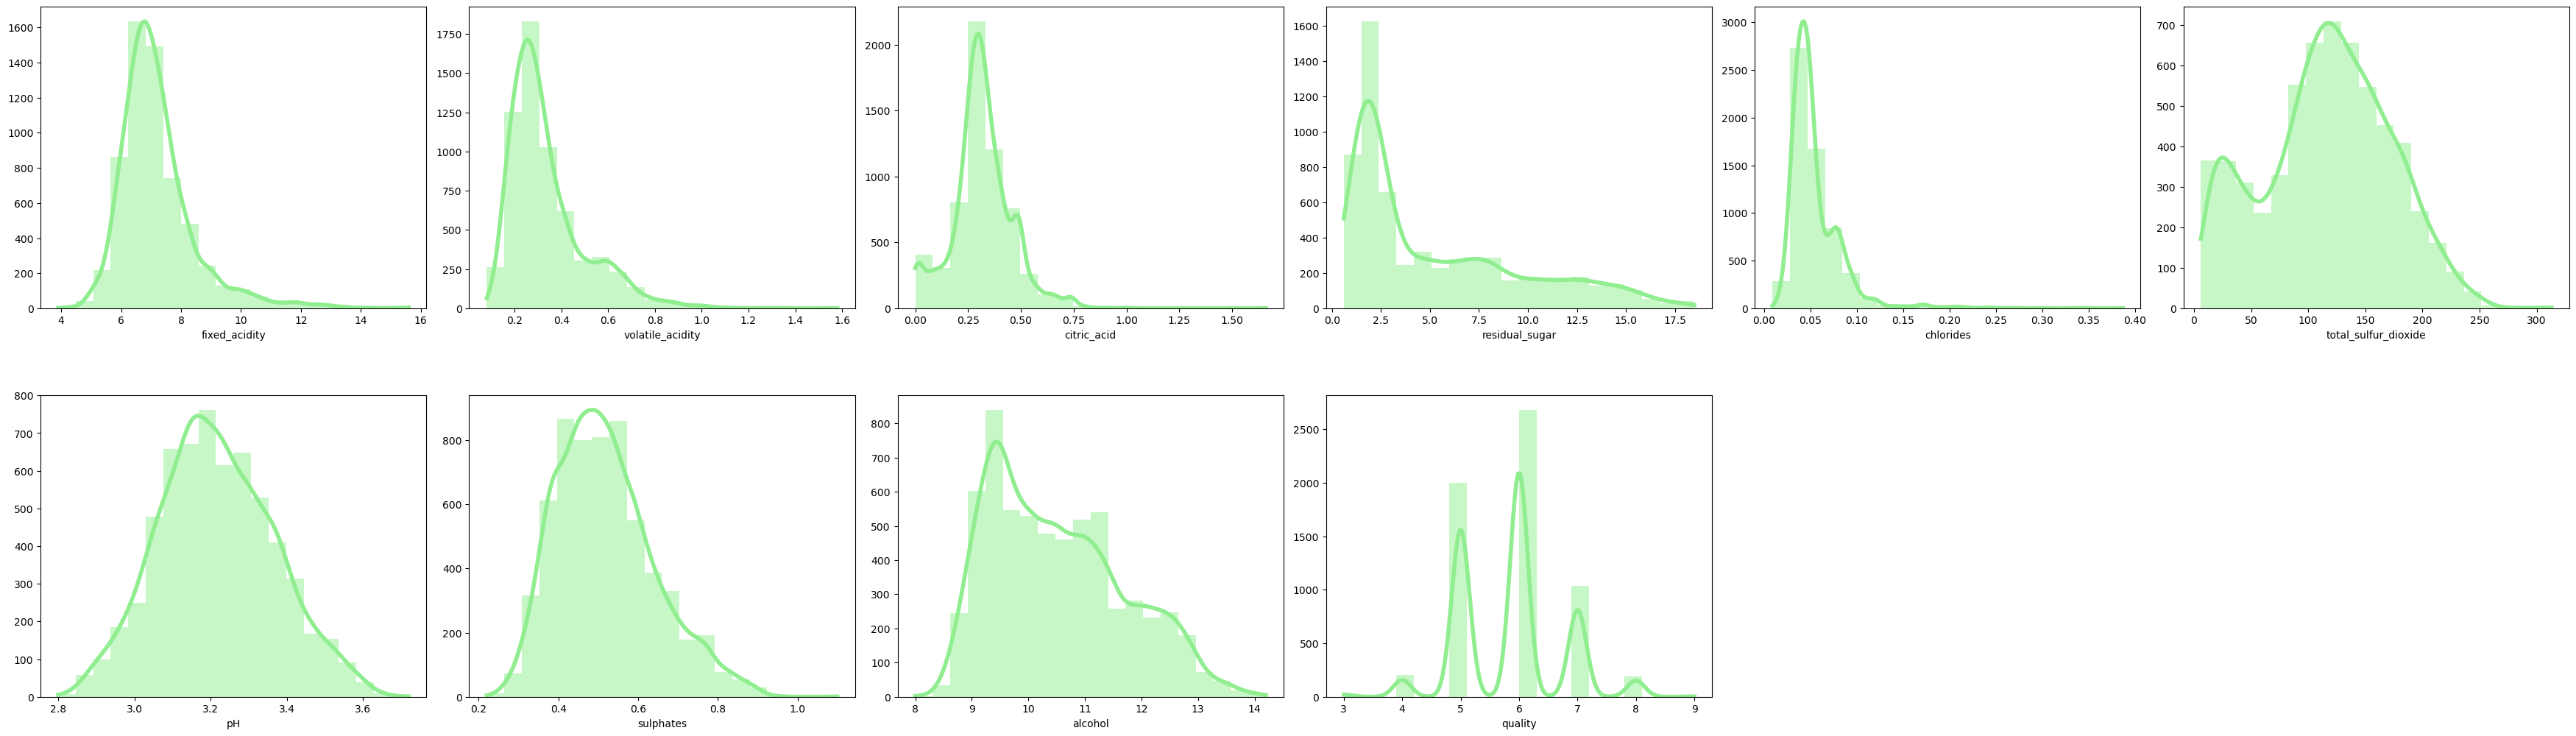

In [79]:
import math

# List of columns you want to exclude
exclude_columns = ['type', 'quality_label']

# Filter out the columns you want to plot
columns_to_plot = [col for col in all_wine_cleaned.columns if col not in exclude_columns]

# Number of columns to plot
num_cols = len(columns_to_plot)

# Calculate the number of rows needed (keeping 6 columns per row)
ncols = 6
nrows = math.ceil(num_cols / ncols)

# Create subplots dynamically
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(35, 5 * nrows))
ax = ax.flatten()

# Create distribution plots for the remaining columns
for index, col in enumerate(columns_to_plot):
    # Plot histogram with KDE
    sns.histplot(all_wine_cleaned[col], bins=20, color='lightgreen', kde=True, ax=ax[index], 
                 line_kws={'color': 'green', 'linewidth': 4}, edgecolor=None).set(ylabel=None)  # No outline for bins
    
    # Set the x-axis label as the column name
    ax[index].set_xlabel(col)

# Remove any unused subplots
for i in range(index + 1, len(ax)):
    fig.delaxes(ax[i])

# Adjust layout for better spacing
plt.tight_layout(pad=0.7, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()


### Normalization with MinMaxScaler

### Skew, Kurtosis & Normality: In which way can we use this?

In [80]:
#Skewness = 0: Then normally distributed.
all_wine_cleaned.skew()

fixed_acidity           1.757451
volatile_acidity        1.520156
citric_acid             0.421505
residual_sugar          1.032369
chlorides               3.186519
total_sulfur_dioxide   -0.074700
pH                      0.174788
sulphates               0.602926
alcohol                 0.541839
quality                 0.200571
quality_label          -0.074173
type                    1.261356
dtype: float64

In [81]:
#Die Kurtosis für die Normalverteilung beträgt 3.
all_wine_cleaned.kurtosis()

fixed_acidity            5.325980
volatile_acidity         2.967258
citric_acid              2.325542
residual_sugar          -0.073289
chlorides               18.513015
total_sulfur_dioxide    -0.591485
pH                      -0.283601
sulphates                0.113161
alcohol                 -0.580727
quality                  0.204048
quality_label           -0.780336
type                    -0.409114
dtype: float64

In [82]:
def is_normal(x, treshhold = 0.05):
    k2,p = stats.normaltest(x)
    print(p)
    print(p > treshhold)
    print('\n')
    return p > treshhold

for name in list(all_wine_cleaned):
    is_normal(np.array(all_wine_cleaned[name]))

0.0
False


0.0
False


1.1062618913331284e-110
False


4.583600508003985e-167
False


0.0
False


3.268725731589813e-43
False


1.6745401460631999e-13
False


6.4990752633642884e-71
False


2.1351029744563061e-97
False


1.768487084513605e-11
False


9.894916073534748e-105
False


7.380905974712273e-237
False




### Machine Learning

### 1. Testing with Wine Type

Logistical Regression

In [83]:
all_wine_cleaned1 = all_wine_cleaned.copy()

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X1 = all_wine_cleaned1.drop('type', axis=1)
y1 = all_wine_cleaned1['type']

# split data
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=1000)

# fit model
LR_model.fit(x1_train, y1_train)

# predictions
preds = LR_model.predict(x1_test)

acc = accuracy_score(y1_test, preds)
print(acc)

0.9829268292682927


Random Forrest

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X1 = all_wine_cleaned1.drop('type', axis=1)
y1 = all_wine_cleaned1['type']

# split data
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=453)

# fit model
RF_clf.fit(x1_train, y1_train)

# predictions
preds = RF_clf.predict(x1_test)

# accuracy
acc = accuracy_score(y1_test, preds)
print(acc)

0.9951219512195122


### 2. Testing with Wine Quality

In [86]:
#preparing dataframe to prevent dataleakage
all_wine_cleaned2 = all_wine_cleaned.copy()
all_wine_cleaned2 = all_wine_cleaned2.drop('quality_label', axis=1)

Logical Regression

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

# split data into X and Y
X2 = all_wine_cleaned2.drop('quality', axis=1)
y2 = all_wine_cleaned2['quality']

# split data
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=1000)

# fit model
LR_model.fit(x2_train, y2_train)

# predictions
preds = LR_model.predict(x2_test)

acc = accuracy_score(y2_test, preds)
print(acc)

0.5357723577235772


c:\Users\janin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X2 = all_wine_cleaned2.drop('quality', axis=1)
y2 = all_wine_cleaned2['quality']

# split data
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=453)

# fit model
RF_clf.fit(x2_train, y2_train)

# predictions
preds = RF_clf.predict(x2_test)

# accuracy
acc = accuracy_score(y2_test, preds)
print(acc)

0.6813008130081301


### 3. Testing with Quality Label

In [89]:
#preparing dataframe to prevent dataleakage
all_wine_cleaned3 = all_wine_cleaned.copy()
all_wine_cleaned3 = all_wine_cleaned3.drop('quality', axis=1)

Logistic Regression

In [90]:
# split data into X and Y
X3 = all_wine_cleaned3.drop('quality_label', axis=1)
y3 = all_wine_cleaned3['quality_label']

# split data
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=42)

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=1000)

# fit model
LR_model.fit(x3_train, y3_train)

# predictions
preds = LR_model.predict(x3_test)

acc = accuracy_score(y3_test, preds)
print(acc)

0.7211382113821139


c:\Users\janin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forrest

In [91]:
# split data into X and Y
X3 = all_wine_cleaned3.drop('quality_label', axis=1)
y3 = all_wine_cleaned3['quality_label']

# split data
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=42)

# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=453)

# fit model
RF_clf.fit(x3_train, y3_train)

# predictions
preds = RF_clf.predict(x3_test)

# accuracy
acc = accuracy_score(y3_test, preds)
print(acc)

0.7967479674796748


Testing Quality Label after Normalization

In [92]:
all_wine_scaled22 = all_wine_cleaned2.copy()

# split data into X and Y
X22 = all_wine_scaled22.drop('quality', axis=1)
y22 = all_wine_scaled22['quality']

# split data
x_train22, x_test22, y_train22, y_test22 = train_test_split(X22, y22, test_size=0.30, random_state=42)

from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(X22)
x_train_scaled22=Scaler.transform(x_train22)
x_test_scaled22=Scaler.transform(x_test22)

In [93]:
# LogisticRegression model
LR_model22 = LogisticRegression(random_state=42)

# fit model
LR_model22.fit(x_train_scaled22, y_train22)

# predictions
preds22 = LR_model22.predict(x_test_scaled22)

#accuracy
acc22 = accuracy_score(y_test22, preds22)
print(acc22)

0.5374186550976139


In [94]:
# Random Forest Classifier model
RF_clf22 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=4)

# fit model
RF_clf22.fit(x_train22, y_train22)

# predictions
preds22 = RF_clf22.predict(x_test22)

# accuracy
acc22 = accuracy_score(y_test22, preds22)
print(acc22)

0.670824295010846


### HELP

Evaluation Metrix

In [95]:
from sklearn.metrics import classification_report

In [96]:
print (classification_report(y1_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.29      0.41       972
           1       0.18      0.57      0.27       258
           2       0.00      0.00      0.00         0

    accuracy                           0.35      1230
   macro avg       0.30      0.29      0.23      1230
weighted avg       0.61      0.35      0.38      1230



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, preds)

array([[282, 674,  16],
       [110, 147,   1],
       [  0,   0,   0]], dtype=int64)

In [98]:
cm = confusion_matrix(y1_test, preds)
cm_df = pd.DataFrame(cm,
                     index = ["White","Red"],
                     columns = ["White","Red"])
plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Quality Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

ValueError: Shape of passed values is (3, 3), indices imply (2, 2)